# Create big cat dataset from Google Images
In this notebook we will see how to easily create an image dataset through Google Images.<br>
In my case, I made a classifier to distinguish between tiger and lion.<br>
Let's get started!!

For reference, this notebook was written with reference to course-v3 provided by fast.ai.<br>
Thanks to fast.ai for providing good learning material :D <br>
(url: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb)

## Get a list of URLs

I decided to build a big cat classifier,<br> 
so I searched for tigers and lions on Google and gathered their urls.<br>

In Google Chrome press `Ctrl+Shift+j` on Windows and a small window the javascript 'Console' will appear.<br>
In the console that appears, enter the following script code to download a file.

`urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));`

In my case the format of the download file was not specified, so I changed it to `.csv`.<br>
This way I got each image url of tigers and lions.<br>
 - tigers: `tiger.csv`
 - lions: `lion.csv`

Move the created `.csv` to the path where notebook is loacated and now get the images form the urls!

## Create directory and dataset

In [1]:
from fastai.vision import *

In [2]:
folder1 = 'tiger'
file1 = 'tiger.csv'

folder2 = 'lion'
file2 = 'lion.csv'

In [3]:
path = Path('data/big_cat')

dest1 = path/folder1
dest2 = path/folder2

dest1.mkdir(parents=True, exist_ok=True)
dest2.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[WindowsPath('data/big_cat/lion'),
 WindowsPath('data/big_cat/lion.csv'),
 WindowsPath('data/big_cat/models'),
 WindowsPath('data/big_cat/tiger'),
 WindowsPath('data/big_cat/tiger.csv')]

`download_images`: download images listed in text file `urls` to path `dest`, at most `max_pics`.<br>
`download_images( urls : PathOrStr, dest : PathOrStr, max_pics : int = 1000, max_workers : int = 8, timeout = 4)`

In [5]:
classes = ['tiger','lion']

download_images(path/file1, dest1, max_pics=200)
download_images(path/file2, dest2, max_pics=200)

Then we can remove any images that can't be opend (using `verify_images`):

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

tiger


lion


## View data

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

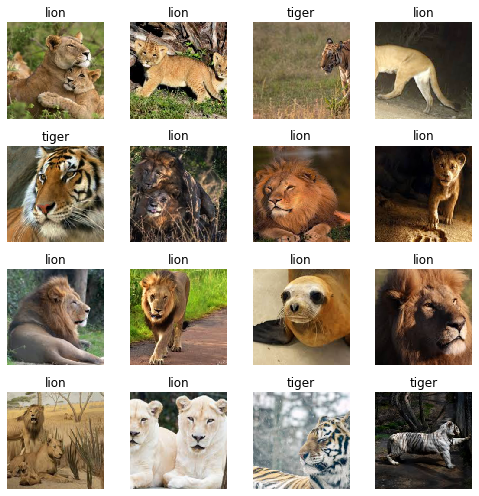

In [8]:
data.show_batch(rows=4, figsize=(7, 7))

# Train model

The data I collected is very small, so I used transfer learning.<br>
Transfer learning is a way to apply a model that has been pre-trained with lots of data to another dataset. <br>
This is known as a very effective way if there is little data!<br>
Let's move again!<br>

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.984105,0.011868,0.000000,00:45
1,0.515100,0.001141,0.000000,00:39
2,0.362505,0.000988,0.000000,00:39


In [11]:
learn.save('stage')

## Interpretation

In [12]:
learn.load('stage')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lion,lion,lion,lion,lion
Path: data\big_cat;

Valid: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tiger,tiger,lion,lion,lion
Path: data\big_cat;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

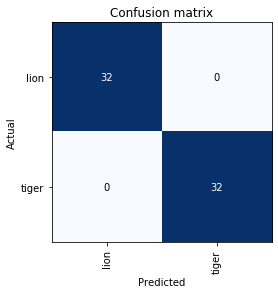

In [14]:
interp.plot_confusion_matrix()